<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/XGBoost_06_XGBoost_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**6 XGBoost 하이퍼파라미터**
=================

6.1 기준 모델 준비
====================

> ### 심장 질환 데이터셋

In [ ]:
import pandas as pd
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# 기준점수 확인
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
model = XGBClassifier(booster='gbtree', objective='binary:logistic')

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(model, X, y, cv=5)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.85 0.85 0.77 0.78 0.77]
정확도 평균: 0.81


> ### StratifiedKFold
> * 각 폴드의 타깃 레이블의 비율을 동일하게 만들어 준다. 
> * 예를 들어 타깃 데이터의 1과 0의 비율이 6:4 라면, 각 폴드의 비율도 6:4 가 된다.

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
# 만들어진 kfold 객체를 cross_val_score(), GridSearchCV, RandomizedSearchCV에 전달하여
# 폴드를 나누는데 사용할 수 있다 

In [ ]:
# # kfold 객체 확인
print('전체 데이터의 클래스 분포:', np.bincount(y))
print()
for split_no, (train_idx, test_idx) in enumerate(kfold.split(X,y)):
  print('{}번째 훈련 폴드:'.format(split_no+1), np.bincount(y[train_idx]))
  print('{}번째 검증 폴드:'.format(split_no+1), np.bincount(y[test_idx]))
  print()

전체 데이터의 클래스 분포: [138 165]

1번째 훈련 폴드: [110 132]
1번째 검증 폴드: [28 33]

2번째 훈련 폴드: [110 132]
2번째 검증 폴드: [28 33]

3번째 훈련 폴드: [110 132]
3번째 검증 폴드: [28 33]

4번째 훈련 폴드: [111 132]
4번째 검증 폴드: [27 33]

5번째 훈련 폴드: [111 132]
5번째 검증 폴드: [27 33]



In [ ]:
# 기준모델의 점수
scores = cross_val_score(model, X, y, cv=kfold)
print('정확도:', np.round(scores, 2))
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [0.75 0.75 0.75 0.82 0.87]
정확도 평균: 0.79


In [ ]:
# GridSaerchCV와 RandomizedSearchCV 사용하기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
def grid_search(params, random=False):
  # 기본값으로 모델 초기화
  xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', random_State=2, verbosity=0, use_label_encoder=False)
  kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
  # random=True면 RandomizedSearchCV, random=False면 GirdSearchCV를 초기화
  if random:
    grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, n_jobs=-1, random_state=2)
  else:
    grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
  grid.fit(X, y)
  best_params = grid.best_params_
  print("최상의 매개변수:", best_params)
  best_score = grid.best_score_
  print("최상의 점수: {:.5f}".format(best_score))

6.2 XGBoost 하이퍼파라미터
====================

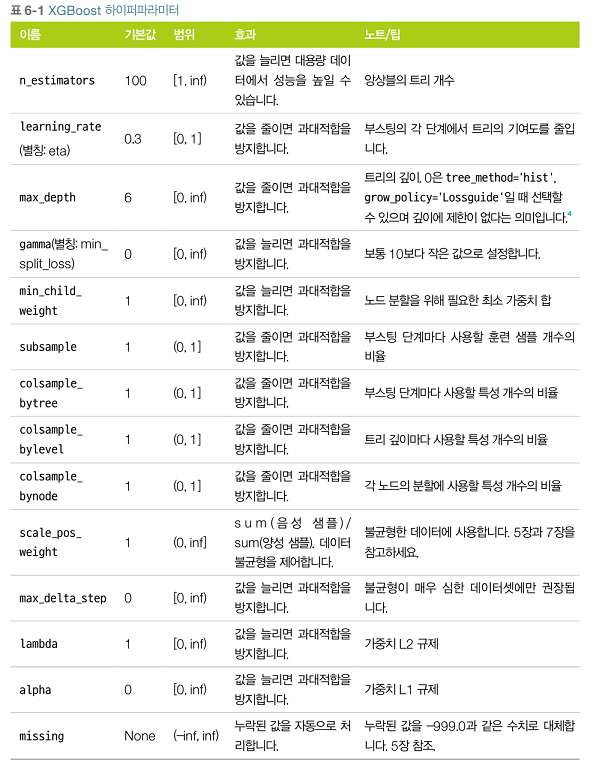

6.3 조기 종료 적용
====================
조기종료는 머신러닝 알고리즘에서 훈려 반복횟수를 제한하는 일반적인 방법  
목표치가 명확하지 않은 대규모 데이터셋에서 유용  
eval_set, eval_metric, early_stopping_rounds 매개변수 사용

> ### 조기 종료란?
> * 예를들어 early_stopping_rounds=10이면 연속적으로 10번의 반복 훈련동안 점수가 향상되지 않으면 훈련을 멈춘다. 
> * 하지만 너무 일찍 종료하면 모델이 나중에 얻는 일반적인 패턴을 놓칠 수 있다. 
> * 따라서 데이터에 있는 복잡한 패턴을 찾는 데 충분한 시간을 주는것이 중요하다. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
model = XGBClassifier(booster='gbtree', objective='binary:logistic')
eval_set = [(X_test, y_test)]
# eval_metric은 분류는 'error', 회귀는 'rmse'
eval_metric = 'error'

In [ ]:
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도 : %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.171053
[1]	validation_0-error:0.118421
[2]	validation_0-error:0.157895
[3]	validation_0-error:0.184211
[4]	validation_0-error:0.157895
[5]	validation_0-error:0.171053
[6]	validation_0-error:0.157895
[7]	validation_0-error:0.144737
[8]	validation_0-error:0.144737
[9]	validation_0-error:0.144737
[10]	validation_0-error:0.131579
[11]	validation_0-error:0.144737
[12]	validation_0-error:0.144737
[13]	validation_0-error:0.144737
[14]	validation_0-error:0.144737
[15]	validation_0-error:0.144737
[16]	validation_0-error:0.157895
[17]	validation_0-error:0.131579
[18]	validation_0-error:0.144737
[19]	validation_0-error:0.144737
[20]	validation_0-error:0.144737
[21]	validation_0-error:0.144737
[22]	validation_0-error:0.144737
[23]	validation_0-error:0.144737
[24]	validation_0-error:0.144737
[25]	validation_0-error:0.144737
[26]	validation_0-error:0.131579
[27]	validation_0-error:0.131579
[28]	validation_0-error:0.131579
[29]	validation_0-error:0.131579
[30]	validation_0-er

In [ ]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic')
eval_set = [(X_test, y_test)]
eval_metric="error"
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=10, verbose=True)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.171053
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.118421
[2]	validation_0-error:0.157895
[3]	validation_0-error:0.184211
[4]	validation_0-error:0.157895
[5]	validation_0-error:0.171053
[6]	validation_0-error:0.157895
[7]	validation_0-error:0.144737
[8]	validation_0-error:0.144737
[9]	validation_0-error:0.144737
[10]	validation_0-error:0.131579
[11]	validation_0-error:0.144737
Stopping. Best iteration:
[1]	validation_0-error:0.118421

정확도: 88.16%


> * 이처럼 일찍 종료할 경우모델이 10번 반복동안 데이터에 있는 패턴을 발견하지 못할 가능성이 있다. 
> * 하지만 이 데이터셋은 매우 작기 때문에 두번의 부스팅 횟수에도 최상의 결과를 낼 수 있다. 
> * n_estimators = 5000, early_stopping_rounds=100 처럼 큰 값을 사용하면 정확도를 향상시킬 수 있다. 

In [ ]:
model = XGBClassifier(n_estimators=5000)
eval_set = [(X_test, y_test)]
eval_metric = 'error'
model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, early_stopping_rounds=100)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.171053
Will train until validation_0-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.118421
[2]	validation_0-error:0.157895
[3]	validation_0-error:0.184211
[4]	validation_0-error:0.157895
[5]	validation_0-error:0.171053
[6]	validation_0-error:0.157895
[7]	validation_0-error:0.144737
[8]	validation_0-error:0.144737
[9]	validation_0-error:0.144737
[10]	validation_0-error:0.131579
[11]	validation_0-error:0.144737
[12]	validation_0-error:0.144737
[13]	validation_0-error:0.144737
[14]	validation_0-error:0.144737
[15]	validation_0-error:0.144737
[16]	validation_0-error:0.157895
[17]	validation_0-error:0.131579
[18]	validation_0-error:0.144737
[19]	validation_0-error:0.144737
[20]	validation_0-error:0.144737
[21]	validation_0-error:0.144737
[22]	validation_0-error:0.144737
[23]	validation_0-error:0.144737
[24]	validation_0-error:0.144737
[25]	validation_0-error:0.144737
[26]	validation_0-error:0.131579
[27]	validation_0-error:0.131579
[28]	validation_0-e

6.4 하이퍼파라미터 조정
====================

In [ ]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[1, 2, 3, 4, 5, None],
                    'n_estimators':[2, 25, 50, 75, 100]}, random=True)

최상의 매개변수: {'subsample': 0.5, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 1, 'learning_rate': 0.5}
최상의 점수: 0.82885


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line

> ### colsample

In [ ]:
# colsample_bytree
grid_search(params={'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bytree': 0.5, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.81557


In [ ]:
# colsample_bylevel
grid_search(params={'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 0.5, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.81557


In [ ]:
grid_search(params={'colsample_bynode':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bylevel':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'colsample_bytree': 0.6, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.84180


In [ ]:
grid_search(params={'gamma':[0, 0.01, 0.05, 0.1, 0.5, 1, 2, 3],
                    'colsample_bynode':[0.9],
                    'colsample_bylevel':[0.8],
                    'colsample_bytree':[0.5],
                    'max_depth':[1], 'n_estimators':[50]})

최상의 매개변수: {'colsample_bylevel': 0.8, 'colsample_bynode': 0.9, 'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 1, 'n_estimators': 50}
최상의 점수: 0.83191
